In [2]:
%pylab inline
import sys
import os
par_dir = os.path.split(os.getcwd())[0]
if par_dir not in sys.path:
    sys.path.append(par_dir)
sys.path.append(r'/Users/artemgolovizin/GitHub')
from scipy.optimize import curve_fit
import inspect
import pickle
import imp
import re
import json


import thulium_python_lib.image_processing_new as impr

Populating the interactive namespace from numpy and matplotlib
Done importing, module image_processing now


## Trap potential
Potential for dipole trap is expressed by
\begin{equation}
\Delta E(r,z) = V_{max}exp^{-2r^2/w(z)^2}
\end{equation}
and for lattice by 
\begin{equation}
\Delta E(r,z)_{lattice} = 4V_{max}exp^{-2r^2/w(z)^2}cos(2\pi z/\lambda)
\end{equation}
where 
\begin{equation}
V_{max} = \frac{\alpha_s P}{c \epsilon_0 \pi w(z)^2}
\end{equation}
It can be approximated with harmonic potential
\begin{equation}
\Delta E(r,z) = (\frac{m}{2})\omega_r^2/2 + (\frac{m}{2})\omega_z^2/2
\end{equation}

In the case of dipole trap 
\begin{equation}
\omega_r = \sqrt{\frac{4\alpha_s P}{c \epsilon_0 m \pi}}1/w_0^2
\end{equation}

From this $\alpha_s$ can be found. Waist diamiter is $50\mu m$.
For data based on measurements of parametric resonances from 2015_06_22 in dipole trap one can calculate $\alpha_s$ to be

- 230 a.u. for 2W of dipole trap power and resonance at 230Hz
- 320 a.u. for 4W of dipole trap power and resonance at 380Hz

This is some coinside with values obtained for optical lattice. 

## For article
Dynamic polarizability at particular optical frequency can be found by detecting parametrically exited atomic vibrations in dipole trap. 
These vibrational frequencies can be calculated using following equations:
\begin{equation}
\omega_{lat\_z} = \sqrt{\frac{32 \pi \alpha_s P}{c \epsilon_0 m }}/{w_0 \lambda}
\end{equation}

\begin{equation}
\omega_{lat\_r} = \sqrt{\frac{16\alpha_s P}{c \epsilon_0 m \pi}}/w_0^2
\end{equation}

\begin{equation}
\omega_{dipole\_r} = \sqrt{\frac{4\alpha_s P}{c \epsilon_0 m \pi}}/w_0^2
\end{equation}

,where $\alpha_s$ - scalar polarizability, P - optical power, m - thulium atomic mass, $\epsilon_0$ - vacuum permitivity, w0 - waist radius and $\lambda$ - trap wavelength. "lat" stands for standing wave dipole trap, and "dipole" stands for travelling wave trap. 
This frequencies can be found by obsirving reduce of number of atoms in the trap while harmonically modulating trap depth. 
In our case, 3-6 W of 532nm Coherent Verdi light passed through acousto optic modulater was used to create optical trap. 
Trap depth modulation was realized by modulating AM input of AOM driver.
Recorded lines are shown on fig2


<img  src="RJ4K7VXUEIBRET476N8E65KMULRK1CHC.png"/>

We could detect parametric resonances for exitation of radial vibrational frequencies in order of few 100 Hz for both standing and travelling wave dipole traps and of vibrations along biam direction in order of few 100 kHz for optical lattice. 
From these measuremens we could estimate scalar polarisability of thulium at 532 nm to be 250 a.u.


/Users/artemgolovizin/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


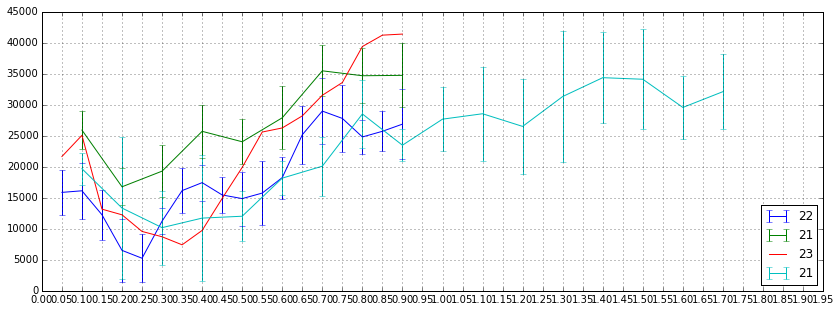

In [32]:
figure(figsize=(14,5))
shot_typeN = 1
d2 = impr.get_avr_data(data['22 pr power=3W depth=0.6']['data'], shot_typeN,  'fit1D_y',0)
errorbar(**d2,label='22')
errorbar(**impr.get_avr_data(data['21 pr power=3W depth=0.5 dipole']['data'], shot_typeN,  'fit1D_y',0),label='21')
d3 = impr.get_avr_data(data['23 pr power=6W depth=0.6']['data'], shot_typeN,  'fit1D_y',0)
d3['yerr']=None
errorbar(**d3,label='23')
errorbar(**impr.get_avr_data(data['24 pr power=6W depth=0.4']['data'], shot_typeN,  'fit1D_y',0),label='21')
legend(loc=4)
xticks(arange(0,2,0.05))
grid(True)

In [3]:
with open('all_data.txt', 'rb') as handle:
    data = pickle.loads(handle.read())
data.keys()

dict_keys(['23 pr power=6W depth=0.6', '14 pr power=3W depth=0.025', '22 pr power=3W depth=0.6', '17 power=6W depth=0.25', '24 pr power=6W depth=0.4', '21 pr power=3W depth=0.5 dipole', '13 pr power=6W depth=0.025'])

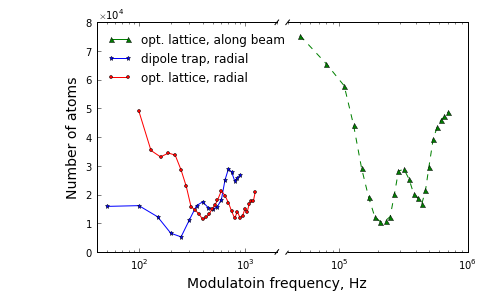

In [4]:
shot_typeN=1
d1 = impr.get_avr_data(data['17 power=6W depth=0.25']['data'], shot_typeN,  'fit1D_y',0)
d1['x'] *= 1e3
#d1['y'] /= max(d1['y'])
d1['fmt']='ro-'
d1['yerr']= None
d1['label'] = 'opt. lattice, radial'
d2 = impr.get_avr_data(data['22 pr power=3W depth=0.6']['data'], shot_typeN,  'fit1D_y',0)
d2['x'] *= 1e3
#d2['y'] /= max(d2['y'])
d2['fmt']='b*-'
d2['yerr']= None
d2['label'] = 'dipole trap, radial'
d3 = impr.get_avr_data(data['13 pr power=6W depth=0.025']['data'], shot_typeN,  'fit1D_y',0)
d3['x'] *= 1e3
#d3['y'] /= max(d3['y'])
d3['fmt']='g^--'
d3['label'] = 'optical lattice, along beam'
d3['yerr']= None

fig, ax = subplots(1, 2, sharey=True)

ax[0].errorbar(**d2,markersize=5)
ax[0].plot([],[],'g^-',label= 'opt. lattice, along beam',markersize=5)
ax[0].errorbar(**d1,markersize=3)
ax[0].set_xscale('log')
ax[0].set_xlim(40,2e3)
ax[1].errorbar(**d3,markersize=5)
ax[1].set_xscale('log')
ax[1].set_xlim(4e4,1e6)
# hide the spines between ax and ax2
ax[0].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[0].yaxis.tick_left()
#ax[1].tick_params(labelright='off')  # don't put tick labels at the top
ax[1].yaxis.set_ticks_position('none')

d = .01  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax[0].transAxes, color='k', clip_on=False)
ax[0].plot((1-d, 1+d), (1-d, 1+d), **kwargs)        # top-left diagonal
ax[0].plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal\kwargs = dict(transform=ax[0].transAxes, color='k', clip_on=False)
kwargs = dict(transform=ax[1].transAxes, color='k', clip_on=False)
ax[0].plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax[0].plot((-d, +d), (1-d, 1+d), **kwargs)  # top-right diagonal

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax[0].yaxis.set_major_formatter(formatter) 
ax[0].set_ylabel('Number of atoms', fontsize=14)
#ax[1].set_xlabel('Modulatoin frequency, Hz', fontsize=14)
tight_layout()
ax[0].legend(loc=2,frameon=False)
#ax[1].legend(loc=2,frameon=False)
ax[0].set_xlabel(' '*40 + 'Modulatoin frequency, Hz', fontsize=14)
#savefig('parametric_resonances.eps')

<Container object of 3 artists>

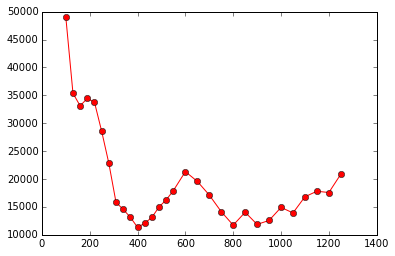

In [7]:
errorbar(**d1)

In [33]:
# functions for calculating polarizabilities
def α_s_dipole(ν, P, w0):
    return (c * ϵ0 * m * m_at * pi * (2 * pi * ν)**2 * w0**4) / (4 * P) / α0
def α_s_r_lattice(ν, P, w0):
    return (c * ϵ0 * m * m_at * pi * (2 * pi * ν)**2 * w0**4) / (16 * P) / α0
def α_s_z_lattice(ν, P, w0):
    return (c * ϵ0 * m * m_at * (2 * pi * ν)**2 * w0**2 * λ**2) / (32 * pi * P) / α0

In [36]:
h_bar * 2 * pi *1e6 * c * ϵ0 * pi *  w0**2 / (4*4) / α0 

52.40031319498186

In [52]:
# constants
k_b = 1.3806488e-23
h_bar = 1.054571726e-34
m_at = 1.66053892e-27
k = 2*pi/(0.5*1e-6)
m = 169
c = 3e8 # m\s
ϵ0 = 8.854187817e-12 #F/m
α0 = 1.6487772731e-41 #C2 m2 J-1
λ = 0.532e-6
w0 = 60e-6 # m, waist

In [54]:
from scipy.constants import *

In [69]:
fine_structure

0.0072973525698

In [53]:
# results
print(α_s_dipole(240,2,w0))
print(α_s_dipole(380,4,w0))
print(α_s_r_lattice(400,4,w0))
print(α_s_z_lattice(210e3,4,w0))

523.2278635156742
655.8515928095778
181.67634149849803
199.43804360613345


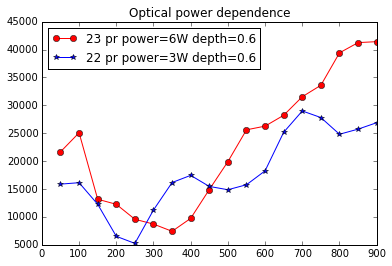

In [16]:
shot_typeN=1
d1 = impr.get_avr_data(data['23 pr power=6W depth=0.6']['data'], shot_typeN,  'fit1D_y',0)
d1['x'] *= 1e3
#d1['y'] /= max(d1['y'])
d1['fmt']='ro-'
d1['yerr']= None
d1['label'] = '23 pr power=6W depth=0.6'
d2 = impr.get_avr_data(data['22 pr power=3W depth=0.6']['data'], shot_typeN,  'fit1D_y',0)
d2['x'] *= 1e3
#d2['y'] /= max(d2['y'])
d2['fmt']='b*-'
d2['yerr']= None
d2['label'] = '22 pr power=3W depth=0.6'
errorbar(**d1)
errorbar(**d2)
legend(loc=2)
title('Optical power dependence')
#savefig('in dipole trap.png')

### Repump from clock level
Для перекачки будет использоваться лазер на 422.267 нм, промежутоный уровень имеет энергию 32446.3 см-1, J=7/2. 

Скорость перехода часовой -> промежуточный 15.7 МГц, промежуточный -> основной 17.5 МГц
Перекачка будет осуществляться по следующим сверхтонким компонентам: часовой F=3 --> промежуточный F=4 --> основной F=4. Переход 3 -> 4 циклический; вероятность распасться с промежуточного на основной 4 -> 4 равна 35/36 = 97%, остальное на F = 3.
